## Task-1 British Airways Data Science Job Simulation Forage

# Web Scraping

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [21]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [22]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I booked through BA becaus...
1,✅ Trip Verified | British airways lost bags ...
2,✅ Trip Verified | The check in process and rew...
3,"✅ Trip Verified | We flew in November 2023, ..."
4,✅ Trip Verified | I left for London from Johan...


In [25]:
df.to_csv(r"C:\Users\gurle\OneDrive\Desktop\Data\BA_reviews.csv", index=False)


# Data Analysis

In [26]:
import pandas as pd

In [27]:
data=pd.read_csv(r"C:\Users\gurle\OneDrive\Desktop\Data\BA_reviews.csv")

In [28]:
data.head()

,reviews
0,✅ Trip Verified | I booked through BA becaus...
1,✅ Trip Verified | British airways lost bags ...
2,✅ Trip Verified | The check in process and rew...
3,"✅ Trip Verified | We flew in November 2023, ..."
4,✅ Trip Verified | I left for London from Johan...


## Data cleaning

In [48]:
print("Missing values:", data.isnull().sum())

Missing values: reviews    0
dtype: int64


In [49]:
# Cleaning the reviews
data['reviews'] = data['reviews'].str.strip()  # Removing leading and trailing whitespaces
data['reviews'] = data['reviews'].str.lower()  # Converting to lowercase
data['reviews'] = data['reviews'].str.replace(r'✅ trip verified \|', '', regex=True)


In [50]:
print(data.head())

                                             reviews
0  i booked through ba because loganair don’t hav...
1  british airways lost bags in lhr then found th...
2  the check in process and reward/loyalty progra...
3  we flew in november 2023, but it took this lon...
4  i left for london from johannesburg at 21:15 o...


In [52]:
num_reviews = len(data)
avg_review_length = data['reviews'].apply(len).mean()

print(f"Total reviews: {num_reviews}")
print(f"Average review length: {avg_review_length:.2f} characters")

Total reviews: 1000
Average review length: 860.69 characters


## Sentiment Analysis

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# sentiment analysis applied to each review
data['Sentiment'] = data['reviews'].apply(get_sentiment)

#sentiment counts
print(data['Sentiment'].value_counts())


Sentiment
negative    527
positive    457
neutral      16
Name: count, dtype: int64


## Wordcloud

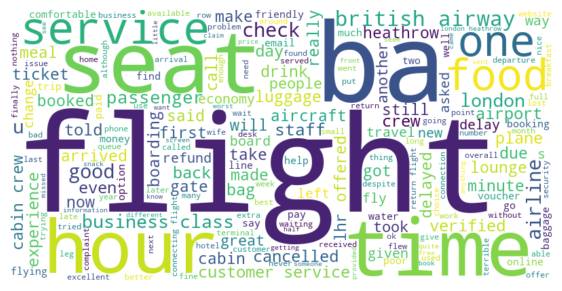

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combining all reviews into a single string
all_reviews = " ".join(data['reviews'])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Displaying the word cloud
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Data Visualization

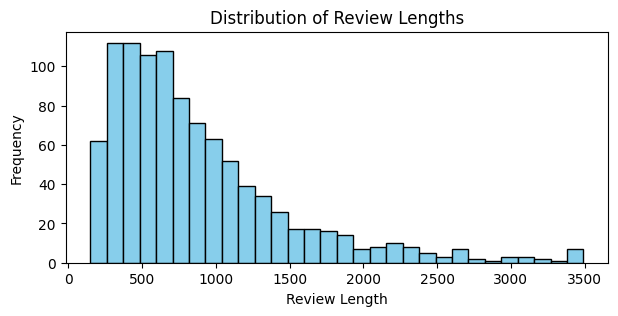

In [65]:
import matplotlib.pyplot as plt

review_lengths = df['reviews'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(7, 3))
plt.hist(review_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


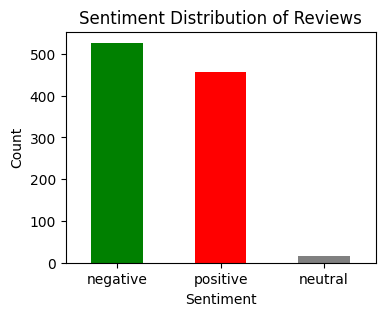

In [69]:

sentiment_counts = data['Sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(4, 3))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gurle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


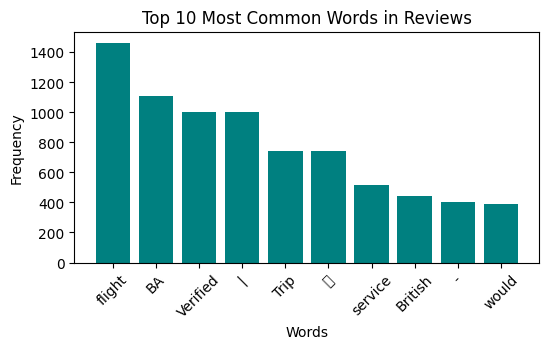

In [74]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize all reviews
all_words = [word for review in df['reviews'] for word in review.split() if word.lower() not in stop_words]

# Get the most common words
word_counts = Counter(all_words).most_common(10)

# Separate words and counts
words, counts = zip(*word_counts)

# Plot the most common words
plt.figure(figsize=(6, 3))
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
